In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../../data/'
pclim = path+'cmems_climatology_mon.nc'

tl,zl,yl,xl = slice(None),slice(-1),slice(-8,8),slice(165,170)
with xr.open_dataset(pclim) as clim:
    t = clim['thetao'][tl,zl].loc[:,:,yl,xl]
    s = clim['so'][tl,zl].loc[:,:,yl,xl]
    print(t.shape)
    to = t.mean(['time','latitude','longitude']).values
    so = s.mean(['time','latitude','longitude']).values
    dep = clim['depth'][zl].values
    dr = np.zeros(dep.shape)
    lev = 0
    for i in range(dep.size):
        dr[i] = 2*(dep[i]-lev)
        lev += dr[i]
pdo = sw.dens0(so,to)

(12, 49, 193, 61)


<xarray.DataArray 'T' (T: 12)> Size: 96B
array(['1968-09-15T00:00:00.000000000', '1968-10-15T00:00:00.000000000',
       '1968-11-14T00:00:00.000000000', '1968-12-14T00:00:00.000000000',
       '1969-01-13T00:00:00.000000000', '1969-02-12T00:00:00.000000000',
       '1969-03-14T00:00:00.000000000', '1969-04-13T00:00:00.000000000',
       '1969-05-13T00:00:00.000000000', '1969-06-12T00:00:00.000000000',
       '1969-07-12T00:00:00.000000000', '1969-08-11T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 96B 1968-09-15 1968-10-15 ... 1969-08-11
Attributes:
    long_name:  model_time

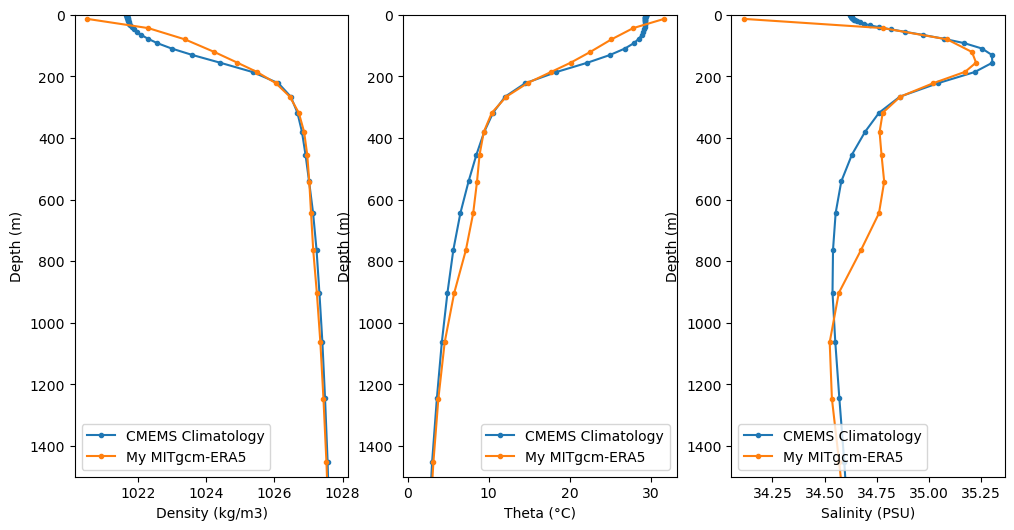

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../output/'
pgrid = path+'grid.nc'
pdync = path+'dync.nc'
with xr.open_dataset(pgrid) as grid:
    z = -grid['Z'].values
    dz = grid['Zl'].values-grid['Zu'].values
i = 29
tl,zl = slice(-12,None),slice(None)
with xr.open_dataset(pdync) as dync:
    display(dync['THETA'][tl]['T'])
    t = dync['THETA'][tl].loc[:,zl,yl,xl]
    s = dync['SALT'][tl].loc[:,zl,yl,xl]
    t,s = t.where(t), s.where(s)
    t = t.mean(['T','Y','X']).values
    s = s.mean(['T','Y','X']).values
    u = dync['UVEL'][tl].loc[:,zl,yl,xl]
    x = u[u.dims[3]].values
    y = u[u.dims[2]].values
pd = sw.dens0(s,t)
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.plot(pdo,dep,marker='.',label='CMEMS Climatology')
plt.plot(pd,z,marker='.',label='My MITgcm-ERA5')
plt.xlabel('Density (kg/m3)')
plt.ylabel('Depth (m)')
plt.ylim(1500,0)
plt.legend()
plt.subplot(132)
plt.plot(to,dep,marker='.',label='CMEMS Climatology')
plt.plot(t,z,marker='.',label='My MITgcm-ERA5')
plt.xlabel('Theta (°C)')
plt.ylabel('Depth (m)')
plt.ylim(1500,0)
plt.legend()
plt.subplot(133)
plt.plot(so,dep,marker='.',label='CMEMS Climatology')
plt.plot(s,z,marker='.',label='My MITgcm-ERA5')
plt.xlabel('Salinity (PSU)')
plt.ylabel('Depth (m)')
plt.ylim(1500,0)
plt.legend()


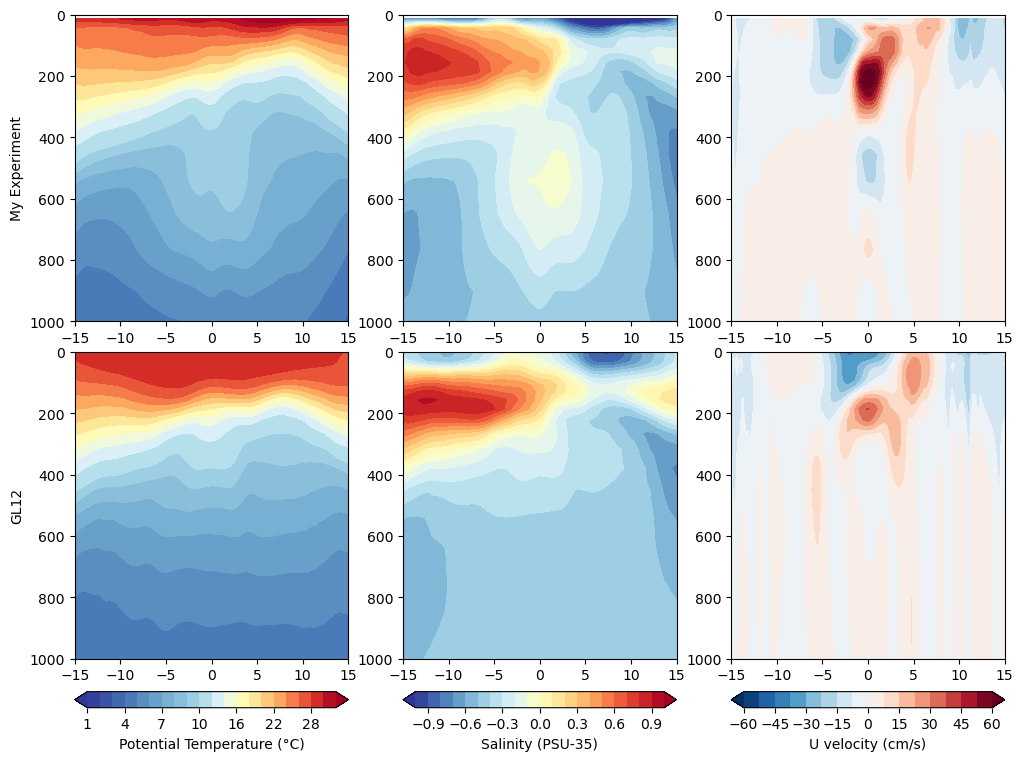

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../../data/'
pclim = path+'cmems_climatology_mon.nc'
tl,zl,yl,xl = slice(None),slice(-1),slice(-15,15),slice(165,170)
with xr.open_dataset(pclim) as clim:
    to = clim['thetao'][tl,zl].loc[:,:,yl,xl]
    so = clim['so'][tl,zl].loc[:,:,yl,xl]
    uo = clim['uo'][tl,zl].loc[:,:,yl,xl]
    xo = uo[uo.dims[3]].values
    yo = uo[uo.dims[2]].values
    zo = uo[uo.dims[1]].values
    to = to.mean(['time','longitude']).values
    so = so.mean(['time','longitude']).values
    uo = uo.mean(['time','longitude']).values

path = '../output/'
i = 25
tl,zl = slice(-12,None),slice(None)
with xr.open_dataset(path+'grid.nc') as grid:
    z = -grid['Z'].values
with xr.open_dataset(path+'dync.nc') as dync:
    t = dync['THETA'][tl].loc[:,zl,yl,xl]
    s = dync['SALT'][tl].loc[:,zl,yl,xl]
    u = dync['UVEL'][tl].loc[:,zl,yl,xl]
    x = u[u.dims[3]].values
    y = u[u.dims[2]].values
    t,s = t.where(t), s.where(s)
    u = u.where(u)
    t = t.mean(['T','X']).values
    s = s.mean(['T','X']).values
    u = u.mean(['T','Xp1']).values
ylim = [1000,0]
fg = plt.figure(figsize=(12,9))
gs = fg.add_gridspec(2,1,height_ratios=[2,0.05],hspace=0.1)
gsf = gs[0].subgridspec(2,3,hspace=0.1)
gsc = gs[1].subgridspec(1,3)

levels = np.concatenate((np.arange(1,10,1),np.arange(10,33,2)))
plt.subplot(gsf[0,0])
plt.contourf(y,z,t,levels,cmap='RdYlBu_r',extend='both')
plt.ylabel('My Experiment')
plt.ylim(ylim)
plt.subplot(gsf[1,0])
im = plt.contourf(yo,zo,to,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.ylabel('GL12')
plt.colorbar(im,cax=plt.subplot(gsc[0]),orientation='horizontal',label='Potential Temperature (°C)')

levels = np.linspace(-1,1,21)
plt.subplot(gsf[0,1])
plt.contourf(y,z,s-35,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(gsf[1,1])
im = plt.contourf(yo,zo,so-35,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.colorbar(im,cax=plt.subplot(gsc[1]),orientation='horizontal',label='Salinity (PSU-35)')

levels = 60*np.linspace(-1,1,17)
plt.subplot(gsf[0,2])
plt.contourf(y,z,u*100,levels,cmap='RdBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(gsf[1,2])
im = plt.contourf(yo,zo,uo*100,levels,cmap='RdBu_r',extend='both')
plt.ylim(ylim)
plt.colorbar(im,cax=plt.subplot(gsc[2]),orientation='horizontal',label='U velocity (cm/s)')


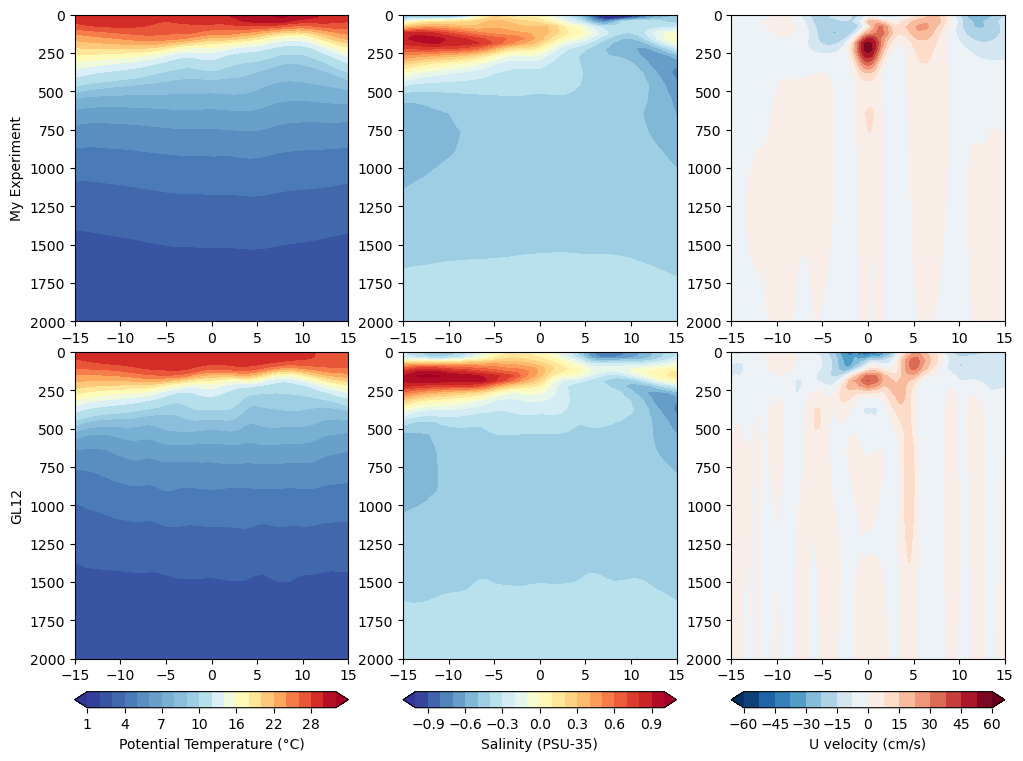

In [38]:
ylim = [2000,0]
fg = plt.figure(figsize=(12,9))
gs = fg.add_gridspec(2,1,height_ratios=[2,0.05],hspace=0.1)
gsf = gs[0].subgridspec(2,3,hspace=0.1)
gsc = gs[1].subgridspec(1,3)
levels = np.concatenate((np.arange(1,10,1),np.arange(10,33,2)))
plt.subplot(gsf[0,0])
plt.contourf(y,z,t,levels,cmap='RdYlBu_r',extend='both')
plt.ylabel('My Experiment')
plt.ylim(ylim)
plt.subplot(gsf[1,0])
im = plt.contourf(yo,zo,to,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.ylabel('GL12')

plt.colorbar(im,cax=plt.subplot(gsc[0]),orientation='horizontal',label='Potential Temperature (°C)')

levels = np.linspace(-1,1,21)
plt.subplot(gsf[0,1])
plt.contourf(y,z,s-35,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(gsf[1,1])
im = plt.contourf(yo,zo,so-35,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.colorbar(im,cax=plt.subplot(gsc[1]),orientation='horizontal',label='Salinity (PSU-35)')
vmin,vmax = -1,1
levels = 60*np.linspace(-1,1,17)
plt.subplot(gsf[0,2])
plt.contourf(y,z,u*100,levels,cmap='RdBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(gsf[1,2])
im = plt.contourf(yo,zo,uo*100,levels,cmap='RdBu_r',extend='both')
plt.ylim(ylim)
plt.colorbar(im,cax=plt.subplot(gsc[2]),orientation='horizontal',label='U velocity (cm/s)')